<a href="https://colab.research.google.com/github/TheMonarch00/Image_Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%ls /content/drive/MyDrive/Internship_ml/images/

bluebell/  lily/  rose/


In [23]:
# Importing required libraries and methods
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread

In [24]:
# Importing the data, resizing and flattening
target = []
images = [] #matrix format of the image
flat_data = []
DATADIR = '/content/drive/MyDrive/Internship_ml/images'

CATAGORIES = ['bluebell','lily','rose']

for i in CATAGORIES:
  class_target = CATAGORIES.index(i) #label encoded the target value
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(300,300,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_target)
    #print(img_resized.shape)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [25]:
# Creating a dataframe
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,269961,269962,269963,269964,269965,269966,269967,269968,269969,269970,269971,269972,269973,269974,269975,269976,269977,269978,269979,269980,269981,269982,269983,269984,269985,269986,269987,269988,269989,269990,269991,269992,269993,269994,269995,269996,269997,269998,269999,Target
0,0.345778,0.569959,0.255595,0.380399,0.607856,0.280412,0.403268,0.638562,0.294129,0.416351,0.655569,0.309806,0.425490,0.674510,0.321569,0.431373,0.678431,0.324837,0.439216,0.674510,0.329412,0.433327,0.672556,0.323529,0.423529,0.670588,0.313725,0.403268,0.662745,0.301307,0.382353,0.656856,0.286268,0.365370,0.647059,2.594902e-01,0.356209,0.630719,0.247059,0.335294,...,0.290196,0.604573,0.227451,0.282353,0.591503,0.227451,0.272542,0.572542,0.227451,0.243780,0.549662,0.212407,0.210458,0.508497,0.171240,0.186275,0.476471,0.133333,0.177124,0.455556,0.133333,0.172549,0.430065,0.133333,0.162745,0.401961,0.129412,0.152941,0.376471,0.125490,0.149020,0.373203,1.333333e-01,0.156863,0.382353,0.137255,0.157516,0.396078,0.133333,0
1,0.415931,0.415931,0.408088,0.416667,0.416667,0.408824,0.419608,0.419608,0.411765,0.418873,0.418873,0.411029,0.419608,0.419608,0.411765,0.415686,0.415686,0.406863,0.414706,0.411765,0.397059,0.415686,0.411765,0.392157,0.421569,0.417647,0.398039,0.415686,0.411765,0.392157,0.409559,0.405637,0.386029,0.413971,0.410049,3.904412e-01,0.411765,0.410784,0.391176,0.407108,...,0.184314,0.377451,0.206863,0.176716,0.385294,0.197059,0.172549,0.384314,0.188235,0.172549,0.384314,0.188235,0.175490,0.387990,0.184069,0.177451,0.390196,0.182353,0.173529,0.387010,0.174265,0.174510,0.390196,0.171324,0.168627,0.389216,0.164951,0.168627,0.396078,0.164951,0.163480,0.394363,1.546569e-01,0.165686,0.400980,0.150000,0.160784,0.400980,0.137255,0
2,0.767503,0.771425,0.996078,0.768627,0.780392,0.992157,0.753673,0.772944,0.992157,0.578013,0.641307,0.988235,0.446991,0.537255,0.992157,0.458531,0.551922,0.992157,0.485175,0.562431,0.992157,0.501681,0.561124,0.991877,0.465595,0.505058,0.967556,0.456706,0.485667,0.958667,0.477465,0.513150,0.975922,0.461157,0.500575,8.890787e-01,0.444536,0.468627,0.645961,0.444307,...,0.214562,0.380392,0.054902,0.227955,0.384314,0.060451,0.227451,0.383190,0.066667,0.226327,0.373836,0.066667,0.195831,0.363582,0.062745,0.206327,0.350805,0.062745,0.209516,0.332732,0.062745,0.199708,0.318593,0.063472,0.198943,0.299948,0.070756,0.187111,0.278370,0.070588,0.183976,0.259320,7.176471e-02,0.168627,0.234304,0.082353,0.163582,0.210850,0.083477,0
3,0.579556,0.437414,0.346985,0.560693,0.397013,0.264614,0.562183,0.369593,0.227048,0.568285,0.359074,0.203922,0.569654,0.365641,0.207843,0.572549,0.370497,0.207843,0.576471,0.376471,0.205137,0.580392,0.389170,0.202895,0.578993,0.400000,0.208185,0.563558,0.393684,0.201869,0.535111,0.376288,0.195052,0.497948,0.345007,1.835686e-01,0.457205,0.310708,0.160131,0.419516,...,0.426797,0.416926,0.745593,0.338745,0.312039,0.618484,0.208118,0.174784,0.471797,0.195296,0.167192,0.519229,0.244719,0.198405,0.627908,0.317922,0.247333,0.737621,0.418826,0.315961,0.829033,0.509333,0.389817,0.919882,0.560967,0.443229,0.979458,0.593806,0.491503,0.988235,0.622002,0.523621,9.882353e-01,0.623712,0.527634,0.988235,0.620102,0.533516,0.992157,0
4,0.631373,0.656209,0.023529,0.624183,0.649020,0.016340,0.615686,0.645098,0.019608,0.612418,0.641176,0.016993,0.615686,0.644444,0.024837,0.603922,0.641176,0.028758,0.596078,0.633333,0.027451,0.591503,0.628105,0.023529,0.569935,0.624837,0.005229,0.554248,0.609150,0.000000,0.538562,0.589542,0.000000,0.522222,0.577124,9.206869e-16,0.506536,0.557516,0.008497,0.486928,...,0.624837,0.698693,0.210458,0.651634,0.733333,0.269281,0.661438,0.743137,0.278431,0.629412,0.715033,0.232026,0.609804,0.696078,0.200000,0.581046,0.670588,0.156209,0.534641,0.628105,0.097386,0.473203,0.566667,0.028105,0.387582,0.481699,0.007843,0.375817,0.448366,0.009804,0.350980,0.418954,5.572884e-16,0.349020,0.415686,0.003268

In [26]:
unique,count = np.unique(target, return_counts=True)

In [27]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 1, stratify = target)

In [28]:
# Hyperparameter Tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC()
parameters = {
    'kernel' : ['linear','rbf'],
    'C' : [0.1,1,10,100]
}
cv = GridSearchCV(svc,parameters,cv = 5)
cv.fit(x_train,y_train)
cv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [29]:
# Fitting the data into model
model = SVC(C=10, kernel='rbf')
model.fit(x_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2,
       0, 1, 0, 0, 2])

In [31]:
# Evaluating the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[9, 0, 0],
       [0, 9, 0],
       [0, 0, 9]])

In [32]:
accuracy_score(y_test,y_pred)

1.0

In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [34]:
# Deploying the model

# Saving the model using pickle library
import pickle
pickle.dump(model,open('img_model.p','wb'))

In [35]:
flower = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://www.thespruce.com/thmb/BeZ0m5h0YEfnaBx3vw9zza2Pz78=/3867x2175/smart/filters:no_upscale()/GettyImages-153342142-56a75f045f9b58b7d0e9bee6.jpg
PREDICTED OUTPUT : lily


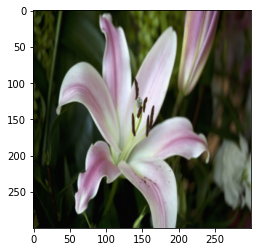

In [36]:
# Testing brand new image
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img,(300,300,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resized)
y_out = flower.predict(flat_data)
y_out = CATAGORIES[y_out[0]]
print(f'PREDICTED OUTPUT : {y_out}')

In [37]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

In [39]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import pickle
from PIL import Image
st.title('Image Classifier Using Machine Learning')
st.text('Upload the Image')

flower = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an Image...",type = "jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')
  if st.button('PREDICT'):
    CATAGORIES = ['bluebell','lily','rose']
    flat_data = []
    img = np.array(img)
    img_resized = resize(img,(300,300,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = flower.predict(flat_data)
    y_out = CATAGORIES[y_out[0]]
    st.write(f'PREDICTED OUTPUT : {y_out}')

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

public_url = ngrok.connect(port='8501')
print(public_url)

nohup: appending output to 'nohup.out'
http://b8a34a2dbae3.ngrok.io
